## Integrate and Fire model

- Equation given by
        
            tv  dv/dt = -v + RI
    - tv, time constant = 10 ms
    - R, resistance = 1

- Threshold, vth = 10
    - when the neuron crosses the threshold, the neuron emits a spike and is reset to 0
        - perhaps use a while loop 
            when >= threshold, reset 
        
        
- Use Euler method to simulate neuron model with time step of 1ms 
    - can re-write the IF moel as 
          
          tv * (v(t+1) - v(t)) / delta t  = -v(t) + RI(t) 
    - delta t = time step
    
    
    - rewritten
    
    
        v(t+1) = v(t) + (delta t/ tv) (-v(t) + RI(t))
 
 - to do
         - simulate neuron for 100ms for different constant currents
             i) I = 9 
             ii) I = 11
             iii) I = 15
         - plot voltage across time for different currents and comment

In [ ]:
## import relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## define euler function

In [2]:
### differential equation function
## dy / dx =(x + y + xy) 
def func(x,y):
    return (x+y+ x*y)

In [3]:
### euler formula
# dy/ dt = f(t, y(t))
# dy/dt = (y(t+h)-y(t))/h
# y(t+h) =~ y(t) + h* dy/dt
# which is approx equal to
# y(t+h) =~ y(t) + h *f(t, y(t))
 
# Function for euler formula 
def euler( x0, y, h, x ): 
    temp = 0
  
    # Iterating till the point at which we need approximation 
    while x0 < x: 
        temp = y 
        y = y + h * func(x0, y) 
        x0 = x0 + h 
    
    return y



In [74]:
## substitute in values

def neuron(timestep, interval, vthreshold, timeconstant, current):
    
    R = 1
    time = np.arange(0,interval,timestep)
    v = np.zeros(len(time))
    trest = 0
    
    ##run for the time given
    for i,t in enumerate(time):        
        if t>trest:
            ## neuron has not reached threshold yet
            v[i] = v[i-1] + (timestep / timeconstant) * (-v[i-1] + R*current)

            #when neuron has reached threshold, reset to 0        
            if v[i-1]>= vthreshold:
                v[i] = 0

    return time,v

In [92]:
## I = 9
time, v_9 = neuron(1,100,10,10,9)

Text(0, 0.5, 'v')

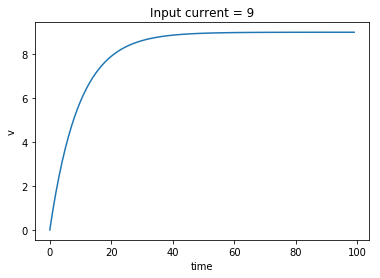

In [93]:
plt.plot(time,v_9)
plt.title('Input current = 9')
plt.xlabel('time')
plt.ylabel('v')

In [94]:
time, v_11 = neuron(1,100,10,10,11)

Text(0, 0.5, 'v')

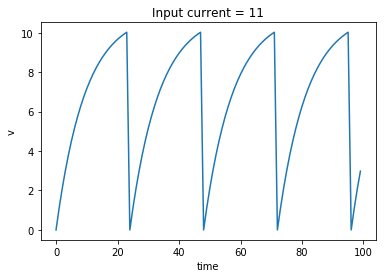

In [95]:
plt.plot(time,v_11)
plt.title('Input current = 11')
plt.xlabel('time')
plt.ylabel('v')

In [96]:
## I = 15

time, v_15 = neuron(1,100,10,10,15)

Text(0, 0.5, 'v')

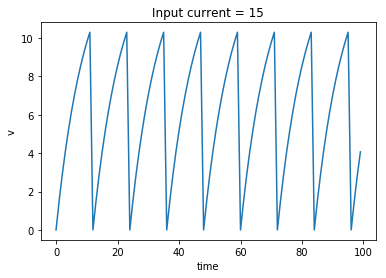

In [97]:
plt.plot(time,v_15)
plt.title('Input current = 15')
plt.xlabel('time')
plt.ylabel('v')